<a href="https://colab.research.google.com/github/Akellesh/DataScience_Course_library2023/blob/main/FDS_114_Approaching_Open_ended_DS_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Dealing with missing data

## Numpy

In [2]:
x = np.array([1,2,3,4,5])
x.sum()

15

In [3]:
print(x.dtype)

int64


If the data 4 is missing in the array, there is '--' provided but this only human understandable, sum can't be performed




In [4]:
x = np.array([1,2,3,'--',5])
print(x.dtype)

<U21


In [5]:
x = np.array([1,2,3,'missing',5])

In [6]:
x = np.array([1,2,3,None,5])

None ad missing is standard way of telling missing values but we can not perform sum function, we will get an error

so we try NaN from numpy

In [7]:
x = np.array([1,2,3,np.nan,5])
print(x.dtype)

float64


In [8]:
x.sum()

nan

If we perform any operation with NaN we will get the result as NaN only

In [9]:
x_b = np.array([True,True,True,False,True])

We are doing fancy indexing

In [10]:
x[x_b]

array([1., 2., 3., 5.])

In [11]:
x[x_b].sum()

11.0

In [12]:
x[x_b].mean()

2.75

Numpy have a function to perform the above operation, masked array concept, this will perform mask out the element

In [13]:
m_x = np.ma.masked_array(x, mask = [0,0,0,1,0])

In [14]:
m_x.sum()

11.0

In [15]:
m_x.mean()

2.75

## Dealing with missing data Pandas

In [16]:
df = pd.read_csv("rooms.csv")
df.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N


This will find the data types of data, even one column contains numberic value it will be identified as object instead of int64 or float64

In [17]:
df.dtype

AttributeError: ignored

we will mention the column name and find isnull function

In [18]:
df.Room_Number.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Room_Number, dtype: bool

To find how many missing values are there

In [19]:
df.Room_Number.isnull().sum()

1

Above is the one column checking, we can select entire dataset, then we will receive bool dataframe
NA, n/a - true, but na found - it is false, so pandas applying some rules to find out the missing values, so we can deal with that by providing missing values to be considered as in a list


In [20]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [21]:
missing_values = ["NA","n/a","na","Empty","--"]

We an re sead the dataset again, so now pandas know to interpret all the values mentioned also to be taken as missing

In [41]:
df = pd.read_csv("rooms.csv",na_values = missing_values)

In [23]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,True,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,True
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


To identify these kind of missing vaalues in the dataset, unique function in pandas is useful

In [24]:
df.Department.unique()

array(['Mechanical', nan, 'Electrical', 'Chemical', 'Civil', 'CS'],
      dtype=object)

We can fill the missing values, there are some methods

In [25]:
df.Occupied.fillna("N")

0    Y
1    N
2    Y
3    Y
4    N
5    Y
6    N
7    Y
8    N
9    N
Name: Occupied, dtype: object

inplace = True will update the value "N" in the df itself

In [42]:
df.Occupied.fillna("N", inplace=True)

In [43]:
def convert_to_binary(v):
    if v == "Y":
        return True
    else:
        return False

In [44]:
df.Occupied = df.Occupied.apply(convert_to_binary)

In [45]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,NaN,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,False
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,NaN,CS,True
8,109.0,NaN,Mechanical,False
9,110.0,2.0,CS,False


The above case is the one way, in a case Room are alloted department wise, so if any missing value in the department, so the above cell department can ebe filled, we are going to use same function fillna but different method

We create one more column to test this method

In [46]:
df["depart2"] = df.Department

Filling of forward value is also called as "pad" / "ffill"

In [33]:
df.Department.fillna(method="ffill",inplace=True)

In [34]:
df

,Room_Number,Num_Students,Department,Occupied,depart2
0,101.0,1.0,Mechanical,False,Mechanical
1,102.0,NaN,Mechanical,False,NaN
2,103.0,3.0,Electrical,False,Electrical
3,104.0,2.0,Mechanical,False,Mechanical
4,105.0,NaN,Chemical,False,Chemical
5,NaN,1.0,Electrical,False,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,NaN,CS,False,CS
8,109.0,NaN,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


Likewise backward fill also can be used, "bfill"

In [47]:
df.Department.fillna(method="bfill",inplace=True)

In [51]:
df.Num_Students.fillna(df.Num_Students.median(),inplace=True)

In [48]:
df

,Room_Number,Num_Students,Department,Occupied,depart2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,NaN,Electrical,False,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,NaN,Chemical,False,Chemical
5,NaN,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,NaN,CS,True,CS
8,109.0,NaN,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


Room number is in order so if it very minimum missing value we can add manually "loc" function, otherwise we can use "interpolate", complex difference also can be learnt,

higher order polynomial also can be used

In [49]:
df.Room_Number.interpolate(inplace=True)

In [52]:
df

,Room_Number,Num_Students,Department,Occupied,depart2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,Electrical,False,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,False,Chemical
5,106.0,1.0,Electrical,True,Electrical
6,107.0,3.0,Civil,False,Civil
7,108.0,2.0,CS,True,CS
8,109.0,2.0,Mechanical,False,Mechanical
9,110.0,2.0,CS,False,CS


# Open ended descriptive statistics

In [54]:
df = pd.read_excel("ameo_2015.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [55]:
df.shape

(3998, 39)

In [56]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [57]:
df.isnull().sum().sum()

0

In [59]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


From the above data type check, all the values are ok, will not need any missing value handling, We need to check, if there is any gender bias

In [60]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

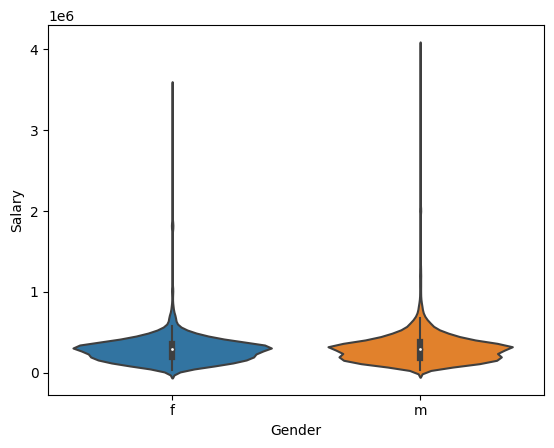

In [61]:
sns.violinplot(x="Gender", y="Salary", data = df);

From the above plot we are not able to say, there is a gender bias, there is a small spike (outlier) in the male plot but median, 25th, 75th percentile all looks similar

Now we are going to subsetting my dataframe with these columns then groupby with particular method

In [62]:
df[["10percentage","12percentage","collegeGPA","Gender"]].groupby("Gender").mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [63]:
df[["10percentage","12percentage","collegeGPA","Gender"]].groupby("Gender").median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [64]:
df[["conscientiousness","agreeableness","extraversion","nueroticism",
    "openess_to_experience","Gender"]].groupby("Gender").mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


5 personality test, test 1,2,3,5 should be positive and test 4 should be lower value, refer internet for better explanation, in resullt female out performed in many perameters

In [65]:
df[["conscientiousness","agreeableness","extraversion","nueroticism",
    "openess_to_experience","Gender"]].groupby("Gender").median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [66]:
df[["Salary","Gender"]].groupby("Gender").mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [67]:
df.Salary.mean()

307699.8499249625

In [68]:
df["Salary"].mean()

307699.8499249625

the above mean value seems to be in the range, so we can add standard deviation to the mean and define as theroshold

In [69]:
df["Salary"].mean() + df["Salary"].std()

520437.34988181875

In [70]:
th = df["Salary"].mean() + df["Salary"].std()

So now we can create new column and find out how many values are more than threshold and add bool value - "True or False" in that column

In [71]:
df["Highincome"] = (df.Salary > th)

In [73]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Highincome
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,False
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,False
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,False
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,True
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,False


In [76]:
df[["Salary","Highincome","Gender"]]

,Salary,Highincome,Gender
0,420000,False,f
1,500000,False,m
2,325000,False,f
3,1100000,True,m
4,200000,False,m
...,...,...,...
3993,280000,False,m
3994,100000,False,f
3995,320000,False,m
3996,200000,False,f


In [78]:
df[["Salary","Highincome","Gender"]].groupby(["Highincome","Gender"]).mean()

Salary
Highincome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

From the above analysis, we can clearly see, in the lower income group female and male salary difference is much lower, and in the higher income group also females income much higher than the male, so there is no bias and some other factor affecting the overall mean we saw from the above analysis

In [79]:
df[["Salary","Highincome","Gender"]].groupby(["Highincome","Gender"]).count()

Salary
Highincome Gender        
False      f          917
           m         2809
True       f           40
           m          232

The interesting finding is that, the number females in the dataset is quit low when we compared to male

In [80]:
print("low income female percentage", 917/(917+2809)*100)
print("High income female percentage", 40/(40+232)*100)

low income female percentage 24.610842726784757
High income female percentage 14.705882352941178


So the finding in the above analysis is that, females are not moving up in the ladder of high paying job, only 14% of female in the higher job paying career

Now we are trying to find out if there is any other column able to supporting evidence or give us reason for the low number of female

In [81]:
df.CollegeTier.unique()

array([2, 1])

In [83]:
df[["CollegeTier","Highincome","Salary"]].groupby(["Highincome","CollegeTier"]).mean()

Salary
Highincome CollegeTier               
False      1            340619.658120
           2            267751.718213
True       1            820238.095238
           2            783803.827751

In [ ]:
df[["CollegeTier","Highincome","Salary"]].groupby(["Highincome","CollegeTier"]).count()

In [ ]:
print("low income female percentage", 3492/(234+3492)*100)
print("High income female percentage", 209/(63+209)*100)

College Tier one of the variable for Highincome

In [ ]:
df[["Gender","CollegeTier","Salary"]].groupby(["CollegeTier","Gender"]).count()

In [ ]:
print("In college tier 1 female percentage", 51/(246+51)*100)
print("In college tier 2 female percentage", 906/(906+2795)*100)

# Agriculture Example

## Part 1

In [9]:
df = pd.read_csv("apy.csv", na_values="=")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [4]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [5]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [6]:
df["Season"].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [7]:
df["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

By analysing unique values of all the features / columns of the data, looks very clean there is no cleaning process or filling needed for the missing data required in this dataset like previous example.

production column is read as object by pandas, but we suppose to get as float/int, so we need to analyse the same

In [8]:
pd.to_numeric(df.Production)

ValueError: ignored

there is an value error in the position 623 string = so, we can go back to the dataframe loading set and give "apy.csv", na_values="=", and run the step again.

If we re run the dtypes again, Production column dtype changed to Float64

In [10]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [12]:
df.Production.isnull().sum()

3727

In [13]:
df.shape

(246091, 7)

out od 246091 rows, 3727 values are NaN values for production column, we will fill those values based on the methods we have seen earlier

by doing so some times we need domain expert, so because of very less percentage of value, we can drop those rows as well

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(242364, 7)

Now the data is cleaned up, so then we can do the visualization part to find out different insites in the dataset

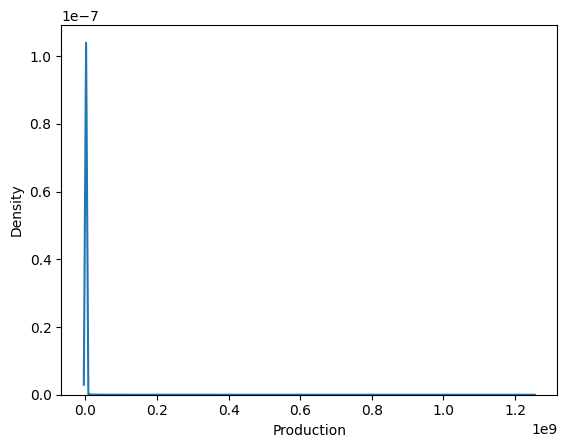

In [16]:
sns.kdeplot(df.Production);

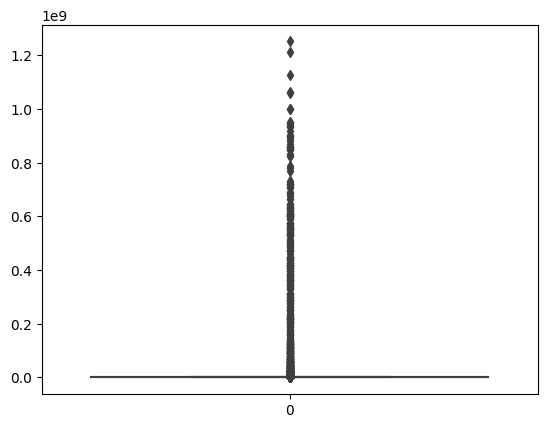

In [17]:
sns.boxplot(df.Production);

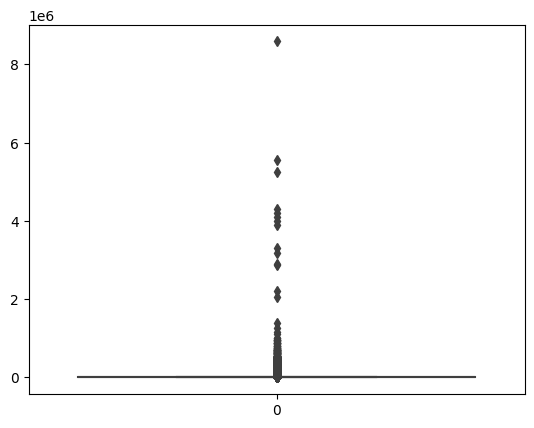

In [18]:
sns.boxplot(df.Area);

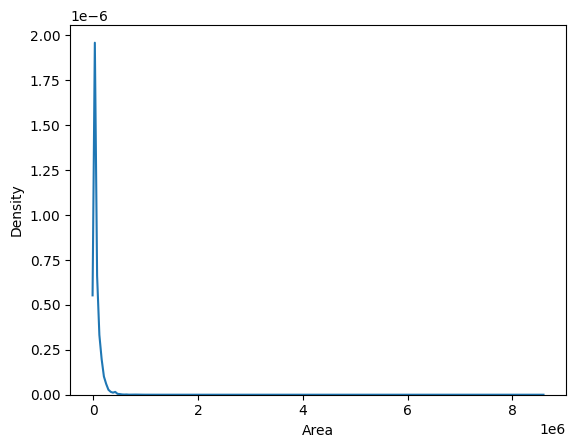

In [19]:
sns.kdeplot(df.Area);

In [20]:
df[df.State_Name == 'Karnataka']

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
76865,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0
76866,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0
76867,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0
76868,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0
76869,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0
...,...,...,...,...,...,...,...
97981,Karnataka,YADGIR,2014,Summer,Onion,7.0,34.0
97982,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0
97983,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0
97984,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0


In [21]:
df[df.State_Name == 'Karnataka']['District_Name'].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

Now we want to group by the state name and crop

In [22]:
df.groupby(["State_Name","Crop","Crop_Year"]).sum()

<ipython-input-22-fd5814db8a1c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["State_Name","Crop","Crop_Year"]).sum()


Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [23]:
df[df.State_Name == "West Bengal"]["Crop"].unique()

array(['Rice', 'Jute', 'Mesta', 'Urad', 'Gram', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Oilseeds total', 'Wheat', 'Arecanut',
       'Arhar/Tur', 'Coconut ', 'Dry chillies', 'Groundnut', 'Linseed',
       'Maize', 'Potato', 'Pulses total', 'Rapeseed &Mustard', 'Sesamum',
       'Sugarcane', 'Turmeric', 'Dry ginger', 'Sunflower',
       'Peas & beans (Pulses)', 'Cotton(lint)', 'Safflower', 'Garlic',
       'Barley', 'Bajra', 'Horse-gram', 'Other Kharif pulses', 'Soyabean',
       'Jowar', 'Niger seed', 'Sannhamp', 'Small millets', 'Tobacco',
       'Ragi', 'Other  Rabi pulses', 'Cardamom', 'Castor seed', 'Moth'],
      dtype=object)

In [24]:
df.groupby(["State_Name","Crop_Year"]).sum()

<ipython-input-24-f2cb0db45757>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["State_Name","Crop_Year"]).sum()


Area   Production
State_Name                  Crop_Year                         
Andaman and Nicobar Islands 2000         44518.00  89060914.00
                            2001         41163.00  89718700.00
                            2002         45231.40  94387137.67
                            2003         44799.40  95296454.67
                            2004         45308.77  87186497.63
...                                           ...          ...
West Bengal                 2010       7246875.00  38308645.00
                            2011       7755360.00  36777774.00
                            2012       7850936.00  38918275.00
                            2013       7999815.00  37901281.00
                            2014       8058390.00  43584403.00

[519 rows x 2 columns]

In [25]:
df_ = df.groupby(["State_Name","Crop_Year"]).sum()

<ipython-input-25-8cb1007bc525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ = df.groupby(["State_Name","Crop_Year"]).sum()


In [26]:
df_.reset_index(inplace=True)

In [27]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,44518.00,89060914.00
1,Andaman and Nicobar Islands,2001,41163.00,89718700.00
2,Andaman and Nicobar Islands,2002,45231.40,94387137.67
3,Andaman and Nicobar Islands,2003,44799.40,95296454.67
4,Andaman and Nicobar Islands,2004,45308.77,87186497.63


In [32]:
df_[["Crop_Year","State_Name"]].groupby(["State_Name"]).count()

,Crop_Year
State_Name,
Andaman and Nicobar Islands,8
Andhra Pradesh,18
Arunachal Pradesh,18
Assam,18
Bihar,18
Chandigarh,13
Chhattisgarh,15
Dadra and Nagar Haveli,17
Goa,12


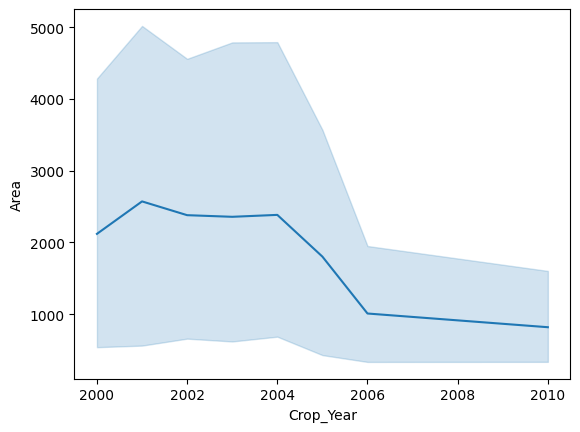

In [33]:
sns.lineplot(x="Crop_Year",y="Area",data=df[df.State_Name == "Andaman and Nicobar Islands"]);

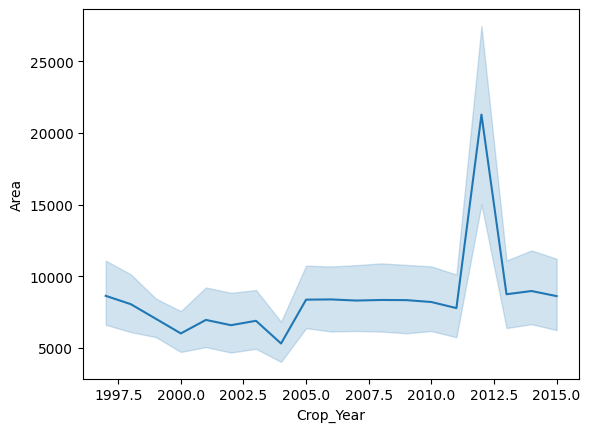

In [34]:
sns.lineplot(x="Crop_Year",y="Area",data=df[df.State_Name == "Odisha"]);

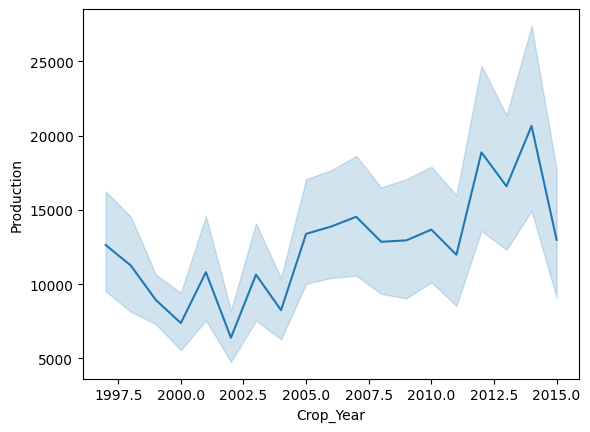

In [35]:
sns.lineplot(x="Crop_Year",y="Production",data=df[df.State_Name == "Odisha"]);

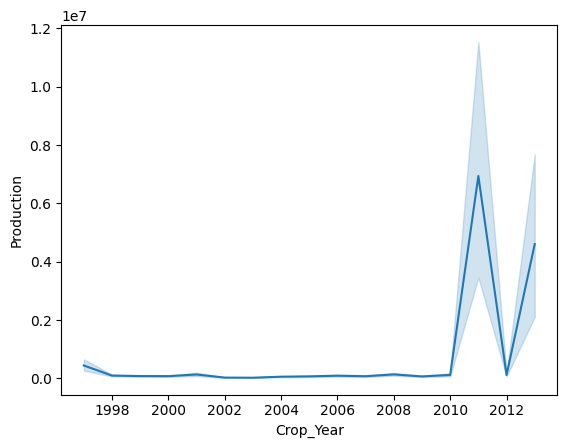

In [36]:
sns.lineplot(x="Crop_Year",y="Production",data=df[df.State_Name == "Tamil Nadu"]);

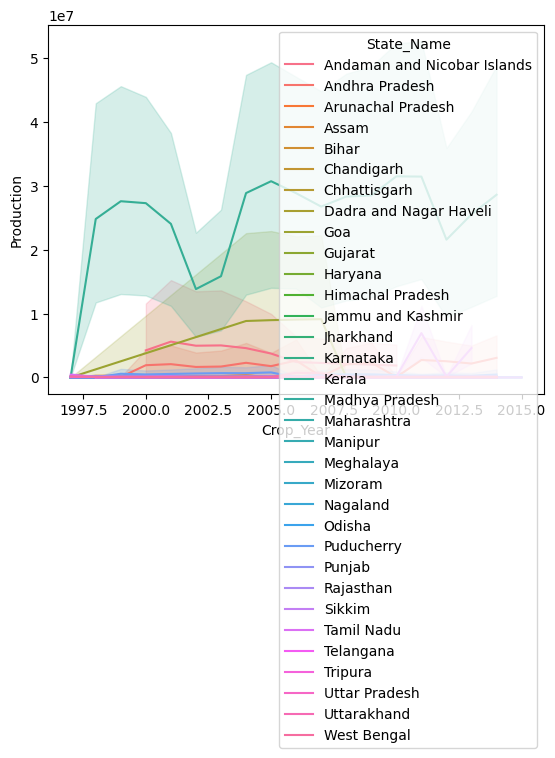

In [38]:
sns.lineplot(x="Crop_Year",y="Production",data=df,hue="State_Name");

In [ ]:
!pip3 install plotly_express

In [40]:
import plotly_express as px

In [41]:
px.scatter(df_,x="Area",y="Production",animation_frame="Crop_Year",
           animation_group="State_Name",color="State_Name")

## Part 2

In [42]:
df_.sort_values("Crop_Year",inplace=True)

In [43]:
df_[(df_.State_Name == "Kerala") & (df_.Crop_Year == 2000)]

,State_Name,Crop_Year,Area,Production
221,Kerala,2000,1887696.0,5.540247e+09


The above is the filltered dataframe, we can take the original dataframe

In [44]:
df[(df.State_Name == "Kerala") & (df.Crop_Year == 2000)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
98020,Kerala,ALAPPUZHA,2000,Autumn,Rice,9808.0,16384.0
98021,Kerala,ALAPPUZHA,2000,Kharif,Sesamum,617.0,201.0
98022,Kerala,ALAPPUZHA,2000,Summer,Rice,17536.0,55953.0
98023,Kerala,ALAPPUZHA,2000,Whole Year,Arecanut,2205.0,917.0
98024,Kerala,ALAPPUZHA,2000,Whole Year,Banana,595.0,4134.0
...,...,...,...,...,...,...,...
101985,Kerala,WAYANAD,2000,Whole Year,Sugarcane,2.0,200.0
101986,Kerala,WAYANAD,2000,Whole Year,Sweet potato,12.0,140.0
101987,Kerala,WAYANAD,2000,Whole Year,Tapioca,1620.0,54917.0
101988,Kerala,WAYANAD,2000,Whole Year,Turmeric,139.0,262.0


We sort the values based on production

In [45]:
df[(df.State_Name == "Kerala") & (df.Crop_Year == 2000)].sort_values("Production")

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
99868,Kerala,KOTTAYAM,2000,Kharif,Sesamum,6.0,1.0
100437,Kerala,MALAPPURAM,2000,Kharif,Ragi,4.0,3.0
99567,Kerala,KOLLAM,2000,Summer,Rice,4.0,4.0
98946,Kerala,KANNUR,2000,Kharif,Sesamum,10.0,6.0
98604,Kerala,IDUKKI,2000,Kharif,Ragi,8.0,7.0
...,...,...,...,...,...,...,...
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0
98953,Kerala,KANNUR,2000,Whole Year,Coconut,96975.0,621000000.0
100445,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0
101425,Kerala,THIRUVANANTHAPURAM,2000,Whole Year,Coconut,88663.0,635000000.0


In [46]:
df[df.Crop.isin(["Rice","Wheat","Maize","Ragi"])]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.00,3663.00
246085,West Bengal,PURULIA,2014,Summer,Maize,325.00,2039.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00


In [48]:
df_ = df[df.Crop.isin(["Rice","Wheat","Maize","Ragi"])].groupby(["State_Name","Crop_Year"]).sum()

<ipython-input-48-7bad8afbc45a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [49]:
df_.head()

Area  Production
State_Name                  Crop_Year                      
Andaman and Nicobar Islands 2000       10881.00    32184.00
                            2001        9801.00    27333.00
                            2002       10885.00    32111.66
                            2003       10561.37    30850.87
                            2004       10734.92    29192.23

In [53]:
df_.reset_index(inplace=True)

In [54]:
df_.sort_values("Crop_Year",inplace=True)

In [55]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Haryana,1997,2996000.0,10134000.0
21,Meghalaya,1997,126632.0,181873.0
20,Rajasthan,1997,3809600.0,8113500.0
19,Andhra Pradesh,1997,2699200.0,6654900.0
18,Manipur,1997,161.0,371.0


In [56]:
px.scatter(df_,x="Area",y="Production",animation_frame="Crop_Year",
           animation_group="State_Name",color="State_Name")

In [65]:
df_["Efficiency"] = df_["Production"] / df_["Area"]

In [66]:
px.scatter(df_,x="Area",y="Efficiency", size="Production",animation_frame="Crop_Year",
           animation_group="State_Name",color="State_Name")

In [67]:
px.scatter(df_,x="Area",y="Efficiency", size="Production",animation_frame="Crop_Year",
           animation_group="State_Name",color="State_Name",range_y= [0.25, 10], range_x=[-1E6, 20E6])